In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import random
import copy

# Welcome to my ML-regression tutorial notebook!

Let's explore some methods for solving a basic problem to get our feet wet with machine learning from scratch. 

 0. Linear Regression
 0. Loss Functions
 0. Gradient Descent
 0. Training with k-fold Cross Validation

## 1. Linear Regression
Let's look at a simple problem: linear regression. First, we'll generate some sample data.

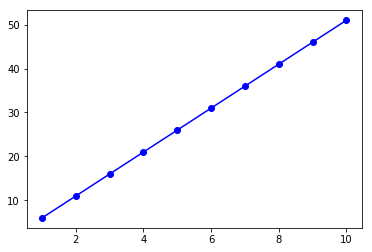

In [2]:
# sample data
x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
y = [5*i+1 for i in x] # exact solution
#y = [6.01, 11.1, 16.83, 21.93, 26.52, 31.72, 36.82, 41.61, 46.71, 51] # random data

plt.plot(x,y,'b-o',label='test data')
plt.show()

We know we want to take our input variables (x) and map them to some line function, 
$y = mx + b$. In machine learning, we use $\mathbf{w} = \{w_1, .. , w_n\}$ as our weighting vector, and $b$ is our bias (sometimes called $w_0$). Together these make up our parameters for the line, 
$y = w_1x + b$.

Let's choose an initial $w_1$ and $b$ value and try to predict the function. We'll ignore the bias for now.

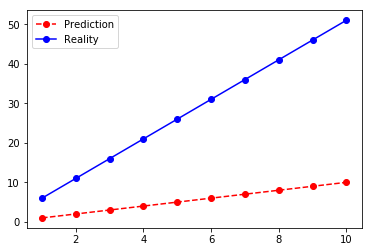

In [3]:
# inital setup
w = 1
b = 0
def pred(x,w,b=0):
    return [(w*i+b) for i in x]

y_p = pred(x,w)

plt.figure(1)
plt.plot(x,y_p,'r--o',label='Prediction')
plt.plot(x,y,'b-o',label='Reality')
plt.legend()
plt.show()

## 2. Loss Functions
Well.. alright, that didn't work; but, how bad was it? Let's define a Loss function (we'll use squared or $L_2$ loss) and the Mean Squared Error. Then, we'll try a bunch of $w_1$ values and plot them against the error.

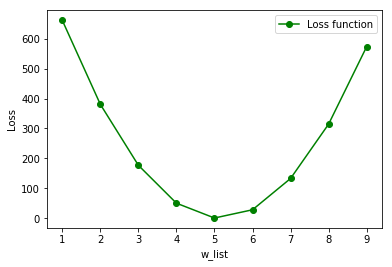

In [4]:
def loss(y,y_p,x):
    l = [(y[i]-y_p[i])**2 for i in range(len(x))]
    mse = sum(l)/len(x)
    return l,mse

w_list = [i for i in np.arange(1,10,1)]

y_p_list = []
l_list = []
mse_list = []
for w in w_list:
    y_p = pred(x,w)
    l, mse = loss(y,y_p,x)
    y_p_list.append(y_p)
    l_list.append(l)
    mse_list.append(mse)
    
plt.figure(2)
plt.plot(w_list,mse_list,'g-o',label='Loss function')
plt.xlabel('w_list')
plt.ylabel('Loss')
plt.legend()
plt.show()

Upon visual inspection, it looks like 5 was pretty close. However, a more rigorous (and programmable) way of determining the minimum value for this convex function is to look at the gradient of the loss function w.r.t. the parameter.

In [5]:
print("Total gradient: {}".format(np.gradient(mse_list)))

Total gradient: [-280.5 -242.  -165.   -88.   -11.    66.   143.   220.   258.5]


## 3. Gradient Descent
That's more like it. Now we can use this information to our advantage in a programmable sense- we know that the best parameter correspondes to the lowest absolute value of the gradient. From here, we could simply increase the number of parameters we try, and perhaps limit our search to between 5 and 6. This is known as the gradient descent method.

Large datasets, like those encountered in machine-learning quantum mechanics (MLQM), can make the calculation of the total gradient descent (IE, using the entire test dataset) intractable. In that case, we can use stochastic gradient descent: we can randomly pick a few initial points from the dataset (called a batch), calculate the gradient, take a step in the right direction, and repeat. If the batch size is between 10-1000 input variables, this is called mini-batch stochastic gradient descent. 

The sign of the gradient tells us which direction to go, and a fraction of the magnitude of the gradient will determine how far we go. This fraction is called the step size or learning rate; or, more generally, a hyperparameter. We'll choose a fixed value, grab some random $w_1$ guesses, and iterate the gradient descent method to convergence.

Starting w values: [3, 8]
converged in 10 iterations
w value: 5.101972963226769
mse: 0.278639085831587


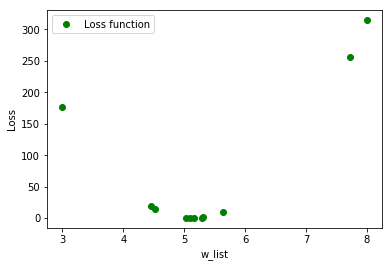

w_list: [3, 8, 7.725, 5.630875, 4.448863125, 4.528163946875, 5.032008524203124, 5.311342122838046, 5.289152123727196, 5.167961838799577, 5.101972963226769]


In [6]:
step = 0.01
max_it = 100
w_list = list(random.sample(range(10), 2))
w = w_list[0]
w_new = w_list[1]
print("Starting w values: {}".format(w_list))

y_p_list = [pred(x,w_list[0])]
l, mse = loss(y,y_p_list[0],x)
l_list = [l]
mse_list = [mse]
abs_grad = [100]
for it in range(1,max_it+1):
    y_p = pred(x,w_new)
    l, mse = loss(y,y_p,x)
    y_p_list.append(y_p)
    l_list.append(l)
    mse_list.append(mse)
    grad = np.gradient(mse_list,w_list)
    abs_grad = [abs(i) for i in grad]
    if min(abs_grad) < 1.0:
        print("converged in {} iterations".format(it))
        print("w value: {}".format(w_new))
        print("mse: {}".format(mse))
        break
    elif it == max_it:
        print("too many iterations")
        print("w value: {}".format(w_new))
        print("mse: {}".format(mse))
        break
    else:
        w = w_new
        w_new = w - step*grad[-1]
        w_list.append(w_new)
    
plt.figure(3)
plt.plot(w_list,mse_list,'go',label='Loss function')
plt.xlabel('w_list')
plt.ylabel('Loss')
plt.legend()
plt.show()
print("w_list: {}".format(w_list))

Great! Maybe it could converge a little faster, and there are definitely some improvements that could be made.. but it seems like it's working. How did we do?

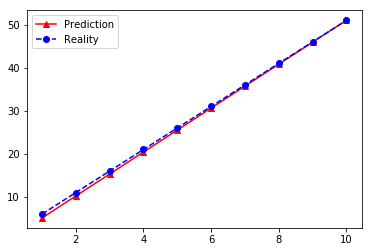

In [7]:
plt.figure(3)
plt.plot(x,y_p,'r-^',label='Prediction')
plt.plot(x,y,'b--o',label='Reality')
plt.legend()
plt.show()

## 4. Training with k-fold Cross Validation
Not bad! These are the basic underpinnings to applying a machine-learning algorithm to a simple real-world problem. The linear regression method can be extended to general-order polynomials through the same algorithm, and the hyperparameter(s) can also be optimized through a machine-learning algorithm. 

While the above model fits the data well, we do not have any idea how it will fit "unknown" data (any data that the model is not aware of). For this, we can split our dataset into "training" and "validation" sets- then, through methods like cross-validation, we can simultaneously guard our algorithm from overfitting and test for instabilities and errors when extrapolating to new data.

Let's wrap the above gradient descent training algorithm into a function, then use k-fold cross-validation to seek out a more robust fit. Essentially, we will cut our total test data into $k$ "folds" of validation and training data; then, we train the model, and test that model on the validation data (which acts in place of our "unknown" data). We save some error statistics, set a different fold as the validation set, and repeat. 

In [8]:
def train(x,y,max_it=100,step=0.01,grad_conv=1.0):
    '''
    optimize w parameter(s) by gradient descent given starting points
    
    x: list of x-values
    y: list of known y-values
    max_it: optional, maximum iterations in gradient descent
    step: optional, step-size/training rate hyperparameter
    '''
    w_list = list(random.sample(range(10), 2))
    w = w_list[0]
    w_new = w_list[1]

    y_p_list = [pred(x,w_list[0])]
    l, mse = loss(y,y_p_list[0],x)
    mse_list = [mse]
    abs_grad = [100]
    for it in range(1,max_it+1):
        y_p = pred(x,w_new)
        l, mse = loss(y,y_p,x)
        y_p_list.append(y_p)
        l_list.append(l)
        mse_list.append(mse)
        grad = np.gradient(mse_list,w_list)
        abs_grad = [abs(i) for i in grad]
        if min(abs_grad) < grad_conv:
            print("converged in {} iterations".format(it))
            print("w value: {}".format(w_new))
            print("mse: {}".format(mse))
            return y_p_list, w_new, mse
        elif it == max_it:
            print("too many iterations")
            print("w value: {}".format(w_new))
            print("mse: {}".format(mse))
            break
        else:
            w = w_new
            w_new = w - step*grad[-1]
            w_list.append(w_new)

In [9]:
def cross_validate(x_list,y_list,k):
    '''
    do gradient-descent training within a k-folds validation scheme
    pop a validation set, train on the remaining data, validate, repeat
    may modify this to:
    1. average the best w values
    2. repeat this procedure to convergence
    
    x_list: list of x-values
    y_list: list of known y-values
    k: number of folds
    '''
    y_list = np.array_split(y_list,k) # split into k folds
    x_list = np.array_split(x_list,k)
    y_p_list = []
    mse_list = []
    for val in range(0,k): # loop over validation sets
        tr_y = copy.deepcopy(y_list) # copy full list
        tr_x = copy.deepcopy(x_list)
        val_y = tr_y.pop(val) # pop out validation points
        val_x = tr_x.pop(val)
        tr_y = np.concatenate(tr_y) # re-form training set
        tr_x = np.concatenate(tr_x)
        y, w, mse = train(tr_x,tr_y) # train to get w
        y_p = pred(val_x,w) # try to predict validation set
        l, mse = loss(val_y,y_p,val_x) # get the loss
        y_p_list.append(y_p) # save it for statistics
        mse_list.append(mse) # keep the mse
    return np.mean(mse_list), y_p_list, mse_list

converged in 9 iterations
w value: 4.787606506569195
mse: 6.854969667856781
converged in 10 iterations
w value: 5.175510289567365
mse: 0.3547572216600806
converged in 7 iterations
w value: 5.2000383999999995
mse: 0.20000002949120033
Cross-validation error: 1.030293793478948


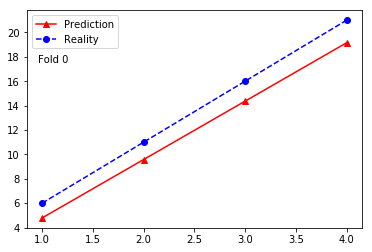

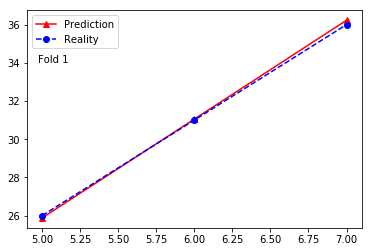

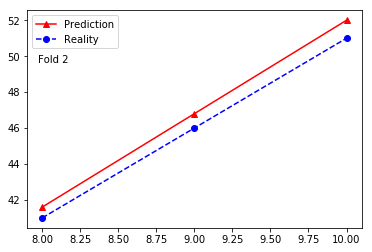

In [13]:
# return k-fold CV avg for w from stochastic gradient descent
k = 3
cv_error, y_p_list, mse_list = cross_validate(x,y,k)
print("Cross-validation error: {}".format(cv_error))

y_list = np.array_split(y,k) # split into k folds
x_list = np.array_split(x,k)
for i in range(0,k):
    plt.figure(4)
    plt.plot(x_list[i],y_p_list[i],'r-^',label='Prediction')
    plt.plot(x_list[i],y_list[i],'b--o',label='Reality')
    plt.figtext(0.15,0.7,'Fold {}'.format(i))
    plt.legend()
    plt.show()

The cross-validation error is a bit higher than the error when we used the full data set. While this may be obvious, it has a less-obvious implication: our model will not fit new data as well as we had hoped. Instead, we should take an average of cross-validated "optimized" parameters! We can choose to simply average them, use a weighted average based on their MSE, or use the best w values in another gradient descent loop; in fact, the latter two are very similar. 

There are many other directions to go. We can introduce additional parameters, such as regularization parameters, to result in Lasso or Ridge Regression schemes. There are also choices of input vector representation- in complicated schemes, "kernelization" is often used to map a seemingly random set of input variables onto a recognizable form, like a Gaussian distribution. This can be coupled with clustering schemes (K-Means clustering is a popular choice), in which similar datapoints are categorized into clusters for easier representation, kernalization, learning, or even just determining efficient training/validation sets.

We can also abstract these procedures in a layered form. If we designed an algorithm that could not only optimize parameters, but "learn" its own form of the line function, it would be a deep learning algorithm, like a neural network.